In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

## Data 

In [40]:
ns = [5, 50, 500]
theta_eta = 1 # the value to be estimated
sigma_eta = np.sqrt(0.1)
ys = []
for n in ns:
    y = np.random.normal(theta_eta, sigma_eta, n)
    ys.append(y)

## Approaches

### Maximum Likelihood Estimation

In [7]:
for y in ys:
    print("The estimation of theta: {}".format(np.mean(y)))

The estimation of theta: 0.9535707796276469
The estimation of theta: 0.9780509925695644
The estimation of theta: 0.9986525575240776


### Bayesian Approach

The estimation of theta: 0.9570472886654288
The estimation of theta: 0.9783915287266554
The estimation of theta: 0.9986859346595889


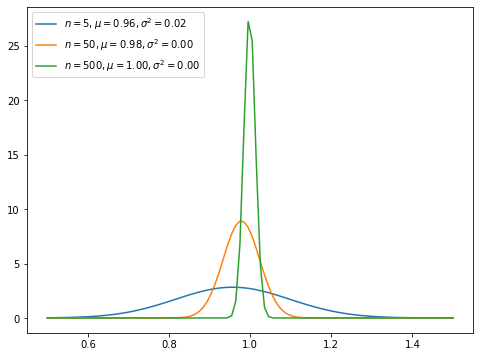

In [8]:
plt.figure(figsize=(8, 6))
for i,n in enumerate(ns):
    y = ys[i]

    # prior
    theta0 = 2 #
    sigma0 = np.sqrt(6)
    y_mean = np.mean(y)
    
    # postorior
    thetaN = (n * sigma0**2 * y_mean + sigma_eta**2 * theta0) / \
                (n * sigma0**2 + sigma_eta**2)
    sigmaN2 = sigma_eta**2 * sigma0**2 / (n * sigma0**2 + sigma_eta**2)

    xn = np.linspace(0.5, 1.5, 100)
    pn = norm(thetaN, np.sqrt(sigmaN2)).pdf(xn)
    print("The estimation of theta: {}".format(thetaN))
    plt.plot(xn, pn, label="$n={}, \mu={:.2f}, \sigma^2={:.2f}$".format(n, thetaN, sigmaN2))
plt.legend(loc=2)
plt.show()

### Regularization (Maximum A Posteriori Estimation)

#### Given that $\lambda$ is custom value

In [24]:
lamb = 2.0

Analytic solution:

In [25]:
for i,n in enumerate(ns):
    y = ys[i]
    y_mean = np.mean(y)
    theta = (n * y_mean + lamb * theta0) / (n + lamb)
    print("The estimation of theta: {}".format(theta))

The estimation of theta: 1.148477991102317
The estimation of theta: 1.064278922782641
The estimation of theta: 0.9972652142874913


Gradient Descent:

In [26]:
def L(theta, theta0, rho=1e-6, lamb=1.0):
    return np.sum((y - theta)**2) + lamb * ((theta - theta0)**2 - rho)

In [27]:
theta0 = 2
epochs = 1000
lr = 0.001
theta = np.random.randn(1)[0]
sigma_eta = np.sqrt(0.1)
for i,n in enumerate(ns):
    y = ys[i]
    for e in range(epochs):
        l = L(theta, theta0, lamb=lamb)
        gradient = - 2 * (n * theta - np.sum(y)) + 2 * lamb * (theta - theta0)
        theta += lr * gradient
    print("The estimation of theta: {}".format(theta))

The estimation of theta: 0.012538627421003765
The estimation of theta: 0.9863021663478605
The estimation of theta: 0.9892111196231338


#### Given that $\lambda =\frac {\sigma_{\eta}^2} {\sigma_0^2}$, validate a close relationship between priors and regularization

In [28]:
lamb = sigma_eta**2 / sigma0**2
lamb

0.01666666666666667

In [29]:
for i,n in enumerate(ns):
    y = ys[i]
    y_mean = np.mean(y)
    theta = (n * y_mean + lamb * theta0) / (n + lamb)
    print("The estimation of theta: {}".format(theta))

The estimation of theta: 0.8118297550264892
The estimation of theta: 1.027174354908977
The estimation of theta: 0.9932878322169008


### Maximum a Posteriori Probability Estimation

In [31]:
for i,n in enumerate(ns):
    y = ys[i]
    y_mean = np.mean(y)
    theta = (n * y_mean + (sigma_eta**2 / sigma0**2) * theta0) /\
            (n + sigma_eta**2 / sigma0**2)
    print("The estimation of theta: {}".format(theta))

The estimation of theta: 0.8118297550264892
The estimation of theta: 1.027174354908977
The estimation of theta: 0.9932878322169008


Three results are consistent!

In [17]:
with pm.Model() as model_g:
    mu = pm.Normal('mu', theta0, sigma0)
    y = pm.Normal('y', mu=mu, sd=sigma_eta, observed=ys[2])
    trace_g = pm.sample(1100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu]
Sampling 2 chains, 0 divergences: 100%|█| 3200/3200 [01:44<00:00, 30.74draws/s]


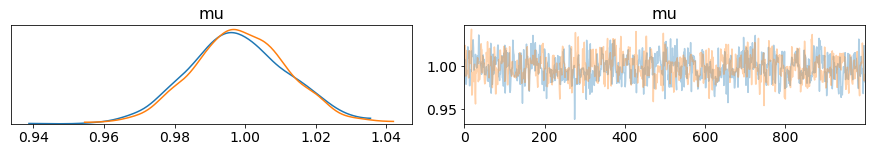

In [19]:
chain_g = trace_g[100:]
pm.traceplot(chain_g)
plt.show()

In [20]:
pm.summary(chain_g)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,0.998,0.014,0.974,1.024,0.001,0.0,739.0,739.0,741.0,1374.0,1.0
